# Organizando uma eleição
(créditos ao professor Rafael)

## Grupo 7
- **Arthur Juan de Lima Ramalho**
- **Gabriel Hitoshi Asato**
- **Luís Eraldo Cassias Pereira**
- **Rodrigo Henrique Dias Vicente**
- **Thyales Ferreira**

O último ano foi extremamente desafiador para você. Além de estarmos vivendo uma pandemia que aumentou nossa preocupação com a nossa própria vida e com nossos entes queridos e estarmos obrigados a passar mais tempo em casa para garantir nossa segurança, você se matriculou em um curso de programação e ciência de dados para mudar de rumo em sua carreira!

O _timing_ pareceu ideal: mais tempo em casa, mais tempo para estudar. Porém, você esbarrou em algumas dificuldades. O condomínio está em reforma, e você passa o dia ao som de marretadas no piso. Durante a noite, no horário da sua aula online, seus vizinhos - um casal passando por dificuldades na relação - costumam discutir em voz alta. A discussão deles frequentemente acorda o bebê do outro vizinho e todos os cachorros do andar no prédio. Deixar para estudar no final de semana não ajuda, pois o filho adolescente da família do apartamento logo acima do seu costuma trazer os colegas de banda para ensaiar. 

A situação se tornou insustentável, e o síndico - que é o mesmo senhorzinho desde que você se mudou para esse condomínio, há mais de 10 anos - não toma atitudes e não gosta de ser perturbado. Chegou a hora de organizar uma eleição para um novo síndico, e você tomou a iniciativa de montar um sistema eletrônico para auxiliar na votação.

***
# Contexto da eleição para estabelecer a lógica.
***
Para estabelecer a lógica do programa, imaginamos que a eleição aconteceria em uma reunião presencial no salão de festas do condomínio.

Um notebook ficaria em uma mesa da sala, onde o sistema de votação estaria rodando.

Na fase de cadastro, o coordenador da reunião operará o notebook.

Ao chegar no salão de festas, cada morador pede para que o coordenador da reunião registre sua presença na reunião através da realização do seu cadastro no sistema eletrônico de eleição. Neste momento, os candidatos também se manifestam.

Chegado o horário do início da eleição, o coordenador da reunião  informa ao sistema que não deseja mais cadastrar ninguém e, caso existam dois ou mais candidatos cadastrados, a eleição começa.

Na fase de votação, o coordenador se afasta do laptop e então cada morador é chamado pelo sistema, na mesma ordem  do cadastro  feito no início da reunião, para votar. Imaginando um cenário mais futurista, o sistema poderia "ler em voz alta" o nome do morador e apartamento para que não fosse preciso ler na tela do laptop.

Tão logo todos os presentes na reunião votarem, o sistema ecenrra a votação e apresenta os resultados.

Caso não existam candidatos cadastrados, o sistema nem inicia a votação. Pois uma nova reunião para eleição precisa ser convocada.

Caso exista um único candidato, o sistema não inicia a votação e declara automaticamente o vencedor.


## Entidades envolvidas

Podemos imaginar as seguintes entidades envolvidas na eleição:

* **Morador**: representa cada uma das pessoas que moram no prédio. Possui um nome, um Apartamento e é capaz de depositar um voto em um Candidato em uma Urna.
* **Candidato**: é um tipo especial de Morador. Possui tudo o que o morador possui, mas também possui um número que será usado para representá-lo na Urna e uma contagem individual de votos.
* **Apartamento**: representa cada uma das unidades do prédio. Possui uma lista de moradores e um status indicando se ele já votou ou não. Cada apartamento tem direito a exatamente 1 voto. Se a sua filha já votou, você não pode mais votar!
* **Urna**: coleciona votos. Ela possui uma coleção de candidatos e uma coleção de moradores (lembrando que o candidato também conta como morador!). Ela armazena a quantidade de votos de cada candidato e é capaz de incrementar essa quantidade ao receber um voto novo. Ela também possui uma coleção de apartamentos e é capaz de determinar quais apartamentos já votaram (mas não qual apartamento votou em cada candidato - o voto é secreto). Quando o último apartamento votar, ela publica os resultados e declara o vencedor.

Vamos pensar juntos em meios de implementar cada uma das classes.

### Morador

A classe mais básica de nossa eleição, representando cada uma das pessoas que habitam no condomínio. O morador obrigatoriamente possui um nome e um Apartamento.

Seu construtor pode ou não receber uma string contendo o nome, e pode ou não receber um objeto Apartamento. Caso ele não receba um nome, deverá solicitar a digitação de um através do input. Caso ele não receba um objeto Apartamento, deverá pedir por input o número do apartamento e criar o objeto.

O nome e apartamento digitados ou recebidos deverão se tornar atributos do objeto.

Nosso objeto também deverá possuir um método para votar. Ele deverá receber um objeto Urna e pode receber um número inteiro correspondente ao número de um candidato ou, caso não receba, irá ler o número pelo teclado. Ela deverá primeiro verificar se o seu apartamento já votou, e caso não tenha, ela irá chamar o método de acrescentar voto na Urna, informando o número de seu candidato e passando seu objeto apartamento. Caso contrário, ela exibirá uma mensagem alertando que esse apartamento já votou.

In [1]:
# Crie sua classe Morador aqui
class Morador:
    """
    Representação de um morador
    """
    def __init__(self, nome, numero_ape):
        """
        Parâmetros
        ----------
        nome : str
            Nome de um dos moradores do prédio. Pode ser ou não o único no apartamento.
        numero_ape : int
            Número do apartamento. É uma unidade do prédio.
        """
        self.nome = nome
        self.numero_ape = numero_ape
    
    def __repr__(self):
        return f"Morador(a) {self.nome}, do apartamento {self.numero_ape}"
    
    def votar(self, urna, numero_candidato):
        """
        Parâmetros
        ----------
        urna : class
            urna é um objeto da classe Urna
        numero_candidato : str
            numero_candidato é o número do candidato cadastrado no objeto urna
        
        Retorno
        -------
            Retorna 1, se o voto foi computado
            Retorna 0, se não foi computado
        """
        # Critérios de validade do voto
        for apartamento in urna.lista_apartamentos:
            
            # (número do apartamento do morador) == (número de um apartamento cadastrado)
            if self.numero_ape == apartamento.numero_ape:
                
                # (nome do morador) == (nome na lista de moradores do apartamento cadastrado)
                for moradores in apartamento.lista_moradores:
                    if self.nome == moradores.nome:

                        # apartamento votou?
                        if apartamento.voto == False:
                            
                            # Critérios atendidos: o voto é computado 
                            urna._receber_voto(numero_candidato)
                            apartamento._alterar_voto = True
                            return 1
                        print( """
                        *********************************
                        *  Esse apartamento já votou!   *
                        *  O voto não será considerado. *
                        *********************************
                        """)
                        sleep(0.5)
                        entrada_qualquer = input("Pressione [Enter] para continuar a votação...")
                        return 0
        return 0

----

### Candidato

Objetos da classe Candidato são, necessariamente, moradores. Eles possuem as mesmas informações e as mesmas ações que um morador. O que isso significa em programação orientada a objeto?

Ele possui outros dois atributos: o seu número que será usado para identificá-lo na Urna e sua contagem de votos. Ambos devem ser inicializados com valor 0. 

Ele deve oferecer métodos para que seu número seja configurado (quando cadastrarmos o candidato na Urna, ela irá fornecer um número para ele), bem como para que sua contagem de votos seja atualizada (ao final da votação, a Urna irá atualizar a contagem de todos os candidatos).

In [2]:
# Crie sua classe Candidato aqui
class Candidato(Morador):
    """
    Representação de Candidato. Herda as características da classe Morador
    """
    def __init__(self, nome, numero_ape):
        """
        Parâmetros
        ---------
        nome : str
            Nome do candidato
        numero_ape : int
            Número do apartamento
        """
        super().__init__(nome, numero_ape)
        self.__numero_candidato = 0
        self.__contagem_voto = 0   
    
    def __repr__(self):
        return f"Candidato(a) {self.nome}, do apartamento {self.numero_ape}"
    
    @property
    def numero_candidato(self):
        return self.__numero_candidato
    
    @numero_candidato.setter
    def _alterar_numero_candidato(self, numero_candidato):
        """
        Atualiza o número do candidato, recurso não disponível para usuário
        """
        self.__numero_candidato = numero_candidato        
              
    @property
    def contagem_voto(self):
        return self.__contagem_voto
    
    @contagem_voto.setter
    def _alterar_contagem_voto(self, numero_votos):
        """
        Atualiza a contagem de votos, recurso não disponível para usuário
        """
        self.__contagem_voto = numero_votos

----

### Apartamento

Objetos da classe Apartamento irão agregar objetos Morador. Isso significa que um de seus atributos será uma lista de moradores. Quando um Apartamento é criado, sua lista começará vazia. O Apartamento deve oferecer métodos para adicionar moradores novos (recebe um objeto Morador e adiciona à lista) e para visualizar seus moradores.

Cada apartamento tem direito a exatamente um voto na eleição para síndico. Portanto, cada objeto também deve ter um atributo indicando se aquele apartamento já votou ou não. A classe deve fornecer meios para que a esse atributo possa ser atualizado, pois quando um morador votar, a urna irá alterar esse atributo registrando que o apartamento já votou.

In [3]:
# Crie sua classe Apartamento aqui
class Apartamento:
    """
    Representa um apartamento com moradores.
    """
    def __init__(self, numero_ape):
        """
        Parâmetros
        ----------
        numero_ape : int
            número do apartamento  
        """
        self.numero_ape = numero_ape
        self.lista_moradores = []
        self.__voto = False
    
    @property
    def voto(self):
        return self.__voto
    
    @voto.setter
    def _alterar_voto(self, boolean):
        """
        Se self.__voto é False, troca-se o valor, recurso não disponível para usuário
        """
        if self.__voto == False:
            self.__voto = boolean
                
    def __repr__(self):
        return f"Apartamento {self.numero_ape}"
    
    def adicionar_morador(self, morador):
        """
        Parâmetro
        ---------
        morador : Morador
            Objeto da classe Morador
            
        Retorno
        -------
            Retorna 0, se não foi adicionado
            Retorna 1, se morador for adicionado na self.lista_moradores
        """
        # Verifica se o morador já mora no apartamento
        for pessoa in self.lista_moradores:
            if morador.nome == pessoa.nome:
                return 0
            
        # Adiciona o morador no apartamento de mesmo número
        if self.numero_ape == morador.numero_ape:
            self.lista_moradores.append(morador)
            return 1
        return 0

----

### Urna
A classe mais complexa do projeto. Ela é responsável por boa parte da lógica da nossa eleição.

Seu construtor deverá criar como atributos uma coleção de apartamentos e outra de candidatos - escolha a estrutura de dados que julgar mais adequada.

A classe deve fornecer métodos que permitam o cadastro de apartamentos (recebendo como parâmetro objetos Apartamento já existentes) e candidatos (idem). Ao receber um candidato para cadastro, ela deverá gerar um número **único** para representar esse candidato na eleição e irá ajustar esse atributo diretamente no objeto candidato.

Ela também deve ter um método para receber um voto, que deve receber um objeto apartamento e o número de um candidato. Ela deve atualizar a contagem de voto do candidato cujo número foi recebido, e marcar aquele apartamento como já votado. Se o apartamento que votou era o último que ainda podia votar, a urna deve imediatamente imprimir os resultados.

Bole uma maneira que a urna possa sinalizar para o programa principal se ela já encerrou a votação ou não.

In [4]:
# Crie sua classe Urna aqui
import matplotlib.pyplot as plt

class Urna:
    """
    Representação de urna para uma votação em condomínio
    """
    def __init__(self, lista_apartamentos = [], lista_candidatos = []):
        """
        Parâmetros
        ----------
        lista_apartamentos : lista
            lista de apartamentos votantes
        lista_candidatos : lista
            lista dos moradores candidatos        
        """
        self.lista_apartamentos = lista_apartamentos
        self.lista_candidatos = lista_candidatos
        self.__total_votos = 0
        
    @property
    def total_votos(self):
        return self.__total_votos
            
    def __repr__(self):
        return "Urna de votação"
    
    def cadastrar_apartamentos(self, apartamento):
        """
        Parâmetro
        ---------
        apartamento : Apartamento
            objeto da classe Apartamento
            
        Retorno
        -------
            Retorna 0, se o apartamento não foi cadastrado
            Retorna 1, se o apartamento foi cadastrado
        """
        # Apartamento não é cadastrado se não existem moradores
        if apartamento.lista_moradores == []:
            return 0
        
        if apartamento not in self.lista_apartamentos:
            self.lista_apartamentos.append(apartamento)
            return 1
        return 0
    
    def cadastrar_candidatos(self, candidato):
        """        
        Parâmetro
        ---------
        candidato : Candidato
            objeto da classe Candidato
            
        Retorno
        -------
            Retorna 0, se o candidato não foi cadastrado
            Retorna 1, se o candidato foi cadastrado
        """
        # Checar a existência do candidato na lista de candidatos
        for pessoa in self.lista_candidatos:
            if candidato.nome == pessoa.nome:
                return 0
            
        # Configura o número do candidato pelo índice na lista
        indice = len(self.lista_candidatos)
        candidato._alterar_numero_candidato = indice
        self.lista_candidatos.append(candidato)
        return 1
    
    def imprimir_candidatos(self):
        print("\nOs candidatos são:")
        print("----------------------------------------------------------")
        for i in range(len(self.lista_candidatos)):
            print(f"{self.lista_candidatos[i].nome}, do apto. {self.lista_candidatos[i].numero_ape}, nº: {i}")
        print("----------------------------------------------------------\n")
    
    def _receber_voto(self, numero_candidato): 
        """
        Atualiza a contagem de votos de cada candidato e a contagem total de votos.       
        Recurso não disponível para usuário
        
        Parâmetro
        ---------
        numero_candidato : int
            Número do candidato, é referente ao seu índice
        """
        # Soma 1 voto para o candidato
        self.lista_candidatos[numero_candidato]._alterar_contagem_voto += 1
        # Soma 1 voto para o total de votos
        self.__total_votos += 1
    
    def status_votacao(self):
        """
        Verifica o status de votação
        
        Retorno
        -------
            Retorna 0 se a votação continua
            Retorna 1 se a votação terminou
        """
        # Caso 1: Se a lista de candidatos contém um candidato, este candidato já é o vencedor
        if len(self.lista_candidatos) == 1:
            # "Chapa única"
            return 1
        
        # Caso 2: Se a lista de candidatos não tiver candidato, não tem votação
        if len(self.lista_candidatos) == 0:
            # "Não tem candidato"
            return 1
        
        # Casos com mais de 1 candidato
        # Caso 3: Número total de votos < número de apartamentos cadastrados
        for pessoa in self.lista_candidatos:            
            if self.__total_votos < len(self.lista_apartamentos):
                # print("Votação em andamento")
                return 0
            
            # Caso 4: Número total de votos == número de apartamentos cadastrados
            # print("Fim da votação")

            return 1
    
    def resultado(self):
        """
        Imprime o resultado da votação
        
        """
        clear_output()
        print("Fim da votação")
        print("--------------")
        print()       
        
        # Lista com todos com as contagens de voto
        votos = []
        for candidato in self.lista_candidatos:
            votos.append(candidato.contagem_voto)
            
        # Candidato com maior número de votos
        n_candidatos_max_votos = 0
        for candidato in self.lista_candidatos:
            if candidato.contagem_voto == max(votos) and (len(self.lista_candidatos) > 1):
                print(f"{candidato.nome} recebeu {max(votos)} votos.")
                n_candidatos_max_votos += 1
        
        print()
        if n_candidatos_max_votos == 1:
            print("Temos um vencedor(a)")
        else:
            print("Houve empate")
        print()
        
        # Função plotar gráfico
        def graficoVotos(candidatos, votos):
            plt.bar(candidatos, votos)
            plt.title('Resultado das eleições')
            plt.xlabel('Candidatos')
            plt.ylabel('Votos')
# -------------------------------------------------------------------------------------------        
        # Caso 1: Mais de 1 candidato
        if (len(self.lista_candidatos) > 1) and (self.status_votacao() == 1):
            lista_candidato_voto=[]
            for candidato in self.lista_candidatos:
                lista_candidato_voto.append(candidato.nome)
            graficoVotos(lista_candidato_voto, votos)
            plt.show()
        
        # Caso 2: Com um candidato
        if (len(self.lista_candidatos) == 1) and (self.status_votacao() == 1):
            for candidato in self.lista_candidatos:
                print(f"Vencedor foi {candidato.nome} (candidato único)")
        
        # Caso 3: Sem candidatos
        if (len(self.lista_candidatos) == 0) and (self.status_votacao() == 1):
                print("Não há candidatos. Remarcar eleição.")

---

## O programa principal

Seu programa principal terá 3 etapas - fique à vontade para modularizar essas etapas com o auxílio de funções, ou mesmo utilizar outras classes se julgar necessário.

* Cadastro: o programa deverá ler informações sobre cada pessoa e ir criando os objetos Morador/Candidato e Apartamento correspondentes. Lembre-se de sempre perguntar se a próxima pessoa a ser lida é ou não candidata para decidir a melhor forma de instanciá-la no sistema.

* Configuração: o programa deverá utilizar as informações obtidas na etapa anterior para criar uma urna.

* Votação: o programa ficará em loop permitindo que diferentes moradores votem (ou tentem votar). Nessa etapa, o programa deve ser capaz de identificar qual o morador votando e utilizar os métodos criados previamente para realizar o voto. Quando a classe Urna informar que a votação acabou, o loop deve ser encerrado.

Fim da votação
--------------

John recebeu 2 votos.
Mary recebeu 2 votos.

Houve empate



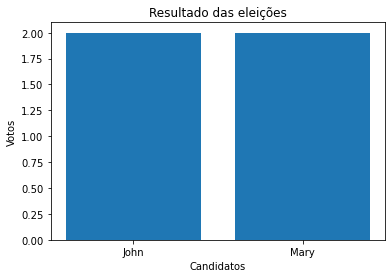

In [5]:
## crie o programa principal aqui

from IPython.display import clear_output
from time import sleep

# Criação de um objeto Urna: urna_sindico
urna_sindico = Urna()

acao = "1"
while acao == "1":
    
    clear_output()
    print("Cadastro de Moradores")
    print("---------------------")
    print()
    
    # Argumentos para os objetos
    sleep(0.5)
    nome = input("Nome do morador: ")
    str_numero_ape = (input("Número do apartamento: "))
    
    while not str_numero_ape.isnumeric():
        str_numero_ape = (input("Número do apartamento: "))
    
    numero_ape = int(str_numero_ape)
        
    
    # Criando o objeto morador
    morador = Morador(nome, numero_ape)
    
    # Criando e cadastrando o objeto candidato
    candidatura = input("Quer se candidatar? [s/n]: ").lower()
    if candidatura == 's':
        candidato = Candidato(nome, numero_ape)
        urna_sindico.lista_candidatos.append(candidato)
   
    # Criando o objeto apartamento e cadastrando
    if urna_sindico.lista_apartamentos == []:
        apartamento = Apartamento(numero_ape)
        apartamento.adicionar_morador(morador)
        urna_sindico.lista_apartamentos.append(apartamento)
        
    else:
        # Cadastra um morador em um apartamento já cadastrado
        for ape in urna_sindico.lista_apartamentos:
            if ape.numero_ape == morador.numero_ape:
                ape.adicionar_morador(morador)
                                
            else:
                # Cadastro de um novo apartamento com o morador
                lista_apes = []
                for ape in urna_sindico.lista_apartamentos:
                    lista_apes.append(ape.numero_ape)

                if numero_ape not in lista_apes:
                    apartamento = Apartamento(numero_ape)
                    apartamento.adicionar_morador(morador)
                    urna_sindico.lista_apartamentos.append(apartamento)
    
    # Continua o cadastro?
    str_acao = input("Use [Enter] para cadastrar outro morador, ou digite 'votar' para iniciar votação.").lower()
    if str_acao == "votar":
        acao = "0"
    else:
        acao = "1"
    


# Votação
while urna_sindico.status_votacao() == 0:
    
    # Dois loops varre a lista de moradores de todos os apartamentos cadastrados
    for apartamento in range(len(urna_sindico.lista_apartamentos)):
        for morador in range(len(urna_sindico.lista_apartamentos[apartamento].lista_moradores)):
            
            clear_output()
            
            print("Votação em andamento")
            print("--------------------")
            print()
            print("Candidatos")
            
            # Imprimir os candidatos: com. imprimir_candidatos()
            urna_sindico.imprimir_candidatos()
            
            print("\nPróximo morador a votar:")
            
            # Morador vota
            print(f"{urna_sindico.lista_apartamentos[apartamento].lista_moradores[morador]}")
            # Digita o número do candidato e            
            # Verifica se o número do candidato é válido
            entrada_valida = False
            while not entrada_valida:
                sleep(0.5)
                str_numero_do_candidato = input("Digite o número do candidato: ")
                if str_numero_do_candidato.isnumeric():
                    numero_do_candidato = int(str_numero_do_candidato)
                    if numero_do_candidato in range(len(urna_sindico.lista_candidatos)):
                        entrada_valida = True
           
            
                
            # Voto é computado
            urna_sindico.lista_apartamentos[apartamento].lista_moradores[morador].votar(urna_sindico, numero_do_candidato)

# Fim da votação, imprime o resultdo
urna_sindico.resultado()

---

## Dicas

* Métodos mágicos: no mínimo uma _representação imprimível_ dos objetos de cada classe seria desejável para facilitar a sua vida. No caso de um morador, podemos imprimir seu nome e número do apartamento. No caso de um candidato, poderíamos incluir o número da urna. No caso do apartamento, seria legal imprimir todos os moradores. E no caso da urna, podemos ter dois casos: antes da votação acabar, apenas a lista de apartamentos que já votou deveria ser impressa. Após o término da votação, ela deveria imprimir quantos votos cada candidato recebeu e qual deles venceu.

* Arquivos e testes: note que vocês sempre foram orientados a passar dados por parâmetros **ou** digitá-los. Se você bolar um esquema inteligente com arquivos em formato padronizado (como CSV) e organizar direitinho seu programa principal, você consegue gerar um único arquivo com todos os moradores e suas respectivas informações (número do apartamento, se é ou não candidato e em quem gostaria de votar) e automatizar completamente as etapas do seu programa.

* Segurança adicional: atualmente, cada apartamento armazena a informação se já votou ou não. Mas e se o apartamento pudesse alterar essa informação e enganar a urna? Você pode colocar uma camada redundante de segurança fazendo com que a urna TAMBÉM controle quais apartamentos já votaram. Mesmo que o apartamento diga que não votou, se a urna está registrando que ele votou, então um hipotético segundo voto deve ser recusado. Veja se consegue pensar em outras possíveis falhas de segurança em potencial no programa. Lembre-se sempre de pensar do ponto de vista de uma classe e "desconfiar" das outras.

* Criatividade: os enunciados trazem o **mínimo** que você precisa fazer para que o seu programa funcione como foi planejado. Isso não impede que você crie outros métodos, acrescente informações que possam ser úteis e até mesmo crie outras classes para modelar melhor outros fatores que poderiam ser considerados na organização da sua eleição.


## Bônus: representação visual dos votos

A função abaixo gera um gráfico de barras mostrando quantos votos cada candidato teve! Cole-a em sua classe Urna e faça os devidos ajustes para que ela use os atributos da Urna ao invés dos parâmetros utilizados. 

O programinha na célula seguinte apenas ilustra o funcionamento da função.


In [6]:
# import matplotlib.pyplot as plt

# def graficoVotos(candidatos, votos):
#     plt.bar(candidatos, votos)
#     plt.title('Resultado das eleições')
#     plt.xlabel('Candidatos')
#     plt.ylabel('Votos')
    

In [7]:
# candidatos = ['Python', 'JavaScript', 'HTML']
# votos = [8, 3, 4]

# graficoVotos(candidatos, votos)

---

---

---